In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('abalone-data.csv')
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

In [4]:
df_md=pd.DataFrame(columns=['Length','Height','Shucked_weight', 'Rings'])
df_dbscan = pd.DataFrame(columns=['Length','Height','Rings','Shucked_weight'])

In [5]:
df.shape

(4177, 9)

In [6]:
df.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole_weight      0.828742
Shucked_weight    0.359367
Viscera_weight    0.180594
Shell_weight      0.238831
Rings             9.933684
dtype: float64

In [7]:
df.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole_weight      0.490389
Shucked_weight    0.221963
Viscera_weight    0.109614
Shell_weight      0.139203
Rings             3.224169
dtype: float64

In [8]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [9]:
df=df[['Length', 'Height','Rings','Shucked_weight']]
dataset = np.vstack([df])

In [10]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN
figsize(8, 5)
xx = np.linspace(0.01, 1.00, 200) #parametri: inizio, fine, numeri 
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=10, metric='euclidean')
    dbscan.fit(dataset) 
    labels = dbscan.labels_
    # yy = size of noise cluster
    yy.append(float(len([1 for i in labels if i == -1])) / len(df)) # Number of clusters in labels, ignoring noise if present.    
plot(xx, yy)
plt.ylabel('Epsilon')
plt.xlabel('Percentuale di outliers')

KeyboardInterrupt: 

In [138]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 15


In [139]:
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<0.01 ] )
print my_eps


0.213969849246


Text(0.5,0,u'Heigth')

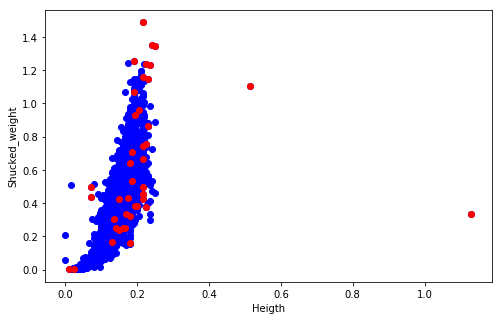

In [141]:
dbscan = DBSCAN(my_eps, min_samples=10, metric='euclidean')
dbscan.fit(dataset)
labels = dbscan.labels_
notnoise= array([ dataset.iloc[i] for i in range(len(dataset))]) #i.loc --> select data from row numbers (https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)
noise = array([ dataset.iloc[i] for i in range(len(dataset)) if labels[i]==-1])
noise2 = array([ dataset.index[i] for i in range(len(dataset)) if labels[i]==-1])

plot(notnoise[:,1], notnoise[:,3], 'bo')
plot(noise[:,1], noise[:,3], 'ro')
plt.ylabel('Shucked_weight')
plt.xlabel('Heigth')

In [142]:
len(noise)

41

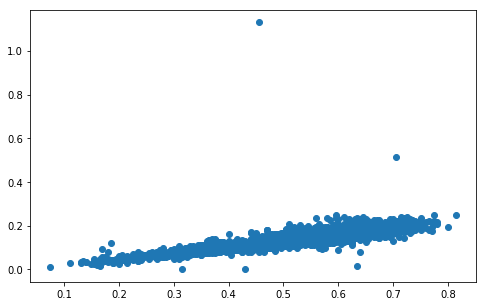

In [143]:
x=df['Length'].values
y=df['Height'].values
z=df['Shucked_weight'].values
k=df['Rings'].values
plt.plot(x,y, 'o')

In [144]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [145]:
from scipy.stats import chi2
def MD_removeOutliers_better(x, y, threshold=0.01):
    MD = MahalanobisDist(x, y)
    prob_larger = 1 - chi2.cdf(MahalanobisDist(x,y), 1.75) 
    nx, ny, outliers = [], [], []
    for i in range(len(MD)):
        if prob_larger[i] > threshold: 
            nx.append(x[i])
            ny.append(y[i])
        else:
            outliers.append(i) 
    return (np.array(nx), np.array(ny), np.array(outliers))

Text(0,0.5,u'Height')

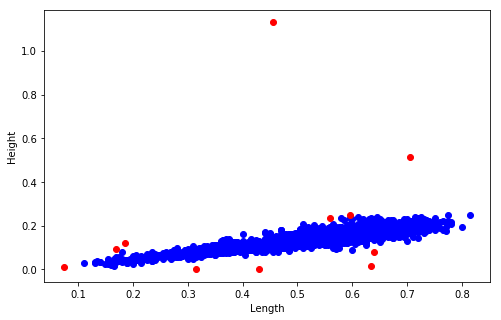

In [146]:
xok, yok, outliers = MD_removeOutliers_better(x,y,0.14)
plot(xok,yok,'bo')
if outliers.any():
    plot(x[outliers], y[outliers],'ro')
plt.xlabel('Length')
plt.ylabel('Height')

Text(0,0.5,u'Shucked_weigth')

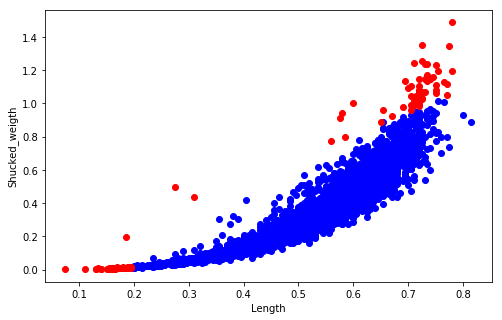

In [147]:
xok, zok, outliers = MD_removeOutliers_better(x,z,0.15)
plot(xok,zok,'bo')
if outliers.any():
    plot(x[outliers], z[outliers],'ro')
plt.xlabel('Length')
plt.ylabel('Shucked_weigth') 

Text(0,0.5,u'Rings')

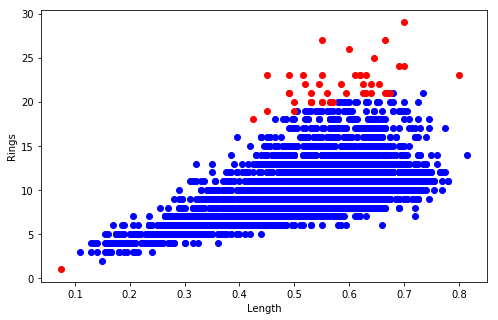

In [148]:
xok, kok, outliers = MD_removeOutliers_better(x,k,0.14)
plot(xok,kok,'bo')
if outliers.any():
    plot(x[outliers], k[outliers],'ro')
plt.xlabel('Length')
plt.ylabel('Rings')   

Text(0,0.5,u'Shucked_weight')

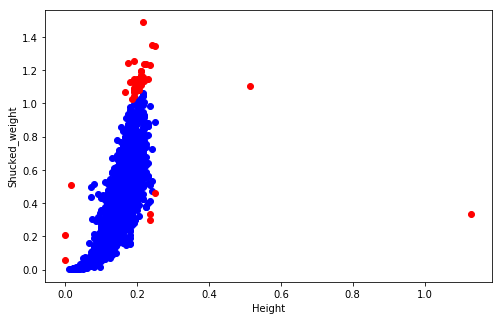

In [149]:
yok, zok, outliers = MD_removeOutliers_better(y,z,0.14)
plot(yok,zok,'bo')
if outliers.any():
    plot(y[outliers], z[outliers],'ro')
plt.xlabel('Height')
plt.ylabel('Shucked_weight')   

Text(0,0.5,u'Rings')

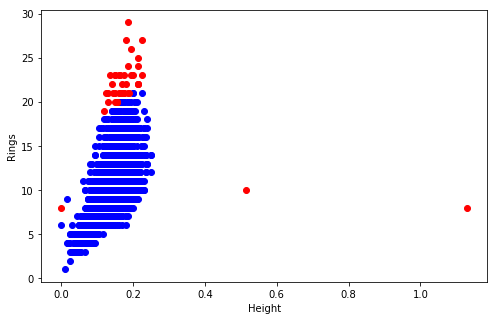

In [150]:
yok, kok, outliers = MD_removeOutliers_better(y,k,0.14)
plot(yok,kok,'bo')
if outliers.any():
    plot(y[outliers], k[outliers],'ro')
plt.xlabel('Height')
plt.ylabel('Rings')   

Text(0,0.5,u'Rings')

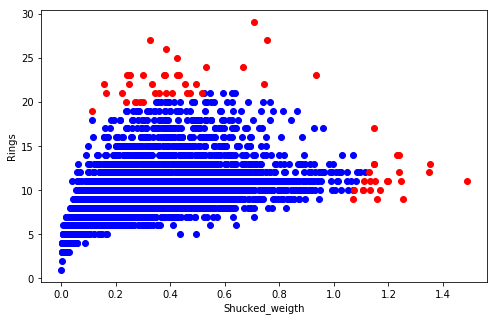

In [151]:
zok, kok, outliers = MD_removeOutliers_better(z,k,0.14)
plot(zok,kok,'bo')
if outliers.any():
    plot(z[outliers], k[outliers],'ro')
plt.xlabel('Shucked_weigth')
plt.ylabel('Rings')   

In [152]:
from sklearn.neighbors import LocalOutlierFactor
dataset=df[['Length', 'Height','Rings','Shucked_weight']]

In [153]:
X= array([ dataset.iloc[i] for i in range(len(dataset))])
# fit the model
clf = LocalOutlierFactor(n_neighbors=910)
y_pred = clf.fit_predict(X)

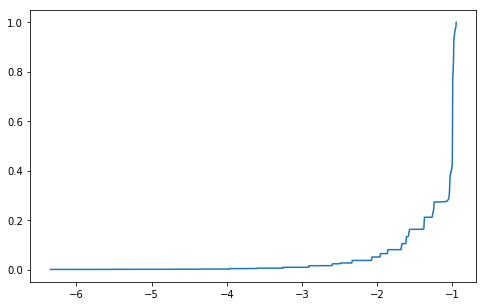

In [154]:
xx = np.linspace(min(clf.negative_outlier_factor_),max(clf.negative_outlier_factor_),100000)
yy = list()
for nlof in xx:
    y_outliers=X[clf.negative_outlier_factor_<=nlof]
    # yy = size of noise cluster
    yy.append(float(len(y_outliers)) / len(X))
plot(xx, yy)

In [155]:
my_nlof = max( [ xx[i] for i in range(len(xx)) if yy[i]<0.01] )
print (my_nlof)

-2.9090109415


Text(0,0.5,u'Height')

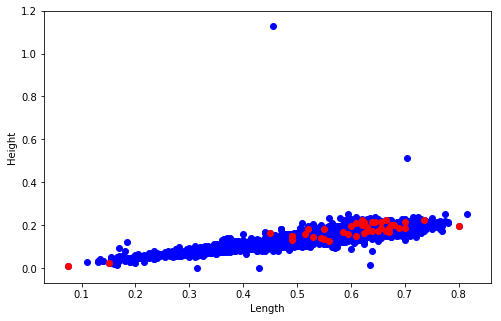

In [156]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 0], X[:, 1], c='blue')
b = plt.scatter(y_outliers[:,0], y_outliers[:, 1], c='red')
plt.xlabel('Length')
plt.ylabel('Height') 

Text(0,0.5,u'Shucked_weight')

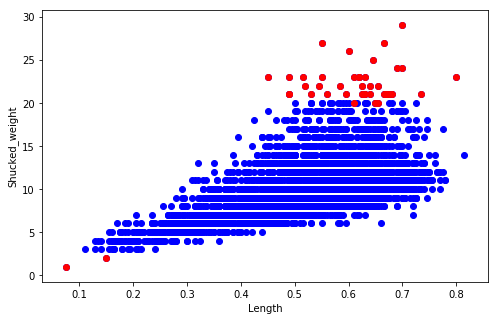

In [157]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 0], X[:, 2], c='blue')
b = plt.scatter(y_outliers[:,0], y_outliers[:, 2], c='red')
plt.xlabel('Length')
plt.ylabel('Shucked_weight') 

Text(0,0.5,u'Rings')

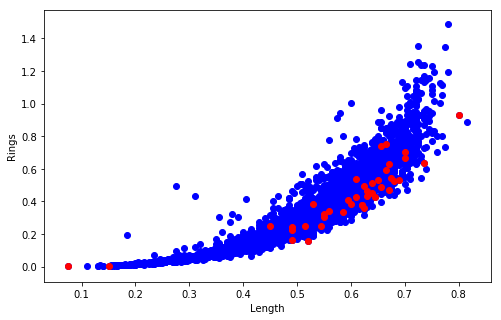

In [158]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 0], X[:, 3], c='blue')
b = plt.scatter(y_outliers[:,0], y_outliers[:, 3], c='red')
plt.xlabel('Length')
plt.ylabel('Rings') 

Text(0,0.5,u'Shucked_weight')

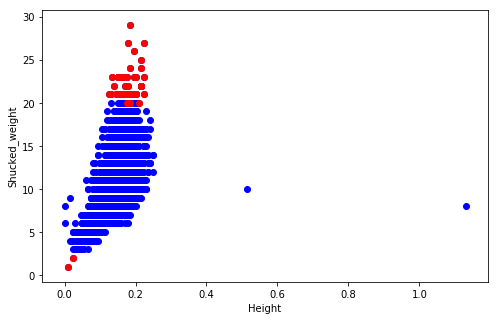

In [159]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 1], X[:, 2], c='blue')
b = plt.scatter(y_outliers[:,1], y_outliers[:, 2], c='red')
plt.xlabel('Height')
plt.ylabel('Shucked_weight') 

Text(0,0.5,u'Rings')

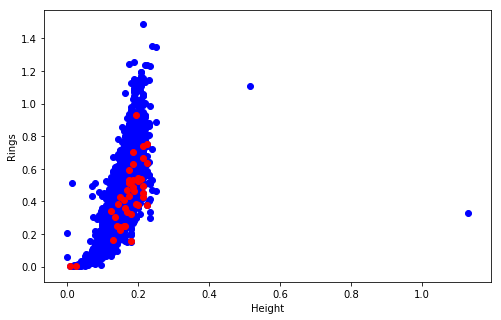

In [160]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 1], X[:, 3], c='blue')
b = plt.scatter(y_outliers[:,1], y_outliers[:, 3], c='red')
plt.xlabel('Height')
plt.ylabel('Rings') 

Text(0,0.5,u'Rings')

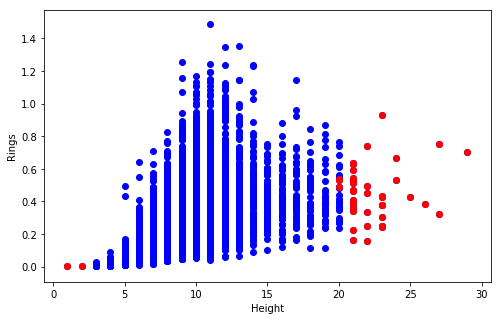

In [161]:
y_outliers=X[clf.negative_outlier_factor_<=my_nlof]
a = plt.scatter(X[:, 2], X[:, 3], c='blue')
b = plt.scatter(y_outliers[:,2], y_outliers[:, 3], c='red')
plt.xlabel('Height')
plt.ylabel('Rings') 

In [189]:
df_md=pd.DataFrame(columns=['Length','Height','Rings','Shucked_weight'])
df_dbscan = pd.DataFrame(columns=['Length','Height','Rings','Shucked_weight'])

In [190]:
for i in noise2:
    df_dbscan = df_dbscan.append(df.iloc[i])
for i in outliers:
    df_md = df_md.append(df.iloc[i])

In [191]:
df_dbscan = df_dbscan[['Length','Height','Rings','Shucked_weight']]
df_md = df_md[['Length','Height','Rings','Shucked_weight']]

In [192]:
df_dbscan = df_dbscan.values
df_md = df_md.values

In [193]:
df_inflo=y_outliers

In [194]:
count = 0
for i in df_inflo:
    for j in df_dbscan:
        if i[0] == j[0] and i[1] == j[1] and i[2] == j[2] and i[3] == j[3]:
            count = count+1

print("Inflo/DBscan", count/41)

count = 0 

for i in df_inflo:
    for j in df_md:
        if i[0] == j[0] and i[1] == j[1] and i[2] == j[2] and i[3] == j[3]:
            count = count+1

print("Inflo/Mahalanobis distance", count/41)

count = 0

for i in df_dbscan:
    for j in df_md:
        for k in df_inflo:
            if k[0]==i[0] == j[0] and k[1]==i[1] == j[1] and k[2]==i[2] == j[2] and k[3]==i[3] == j[3]:
                count = count+1
print("DBscan/Mahalanobis distance/Inflo", count/41)

('Inflo/DBscan', 0)
('Inflo/Mahalanobis distance', 0)
('DBscan/Mahalanobis distance/Inflo', 0)
